# 使用``gluon``从高维线性回归看过拟合与正则化

In [1]:
import mxnet as mx
import numpy as np

from mxnet import nd
from mxnet import gluon
from mxnet import autograd

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
num_train = 20
num_test = 100
num_inputs = 200
num_outputs = 1

X_data = nd.random.normal(shape=(num_train + num_test, num_inputs))
X_train = train_data = X_data[:num_train, :]
X_test = test_data = X_data[num_train:, :]

true_w = 0.01 * nd.ones(shape=(num_inputs, num_outputs))
true_b = 0.05 * nd.ones(shape=(num_outputs))

y_data = nd.dot(X_data, true_w) + true_b
noise = 0.01 * nd.random.normal(shape=y_data.shape)
y_data += noise

y_train = y_data[:num_train, :]
y_test = y_data[num_train:, :]

In [3]:
batch_size = 1
train_data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X_train, y_train), 
                                        batch_size=batch_size, shuffle=True)
test_data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X_test, y_test),
                                      batch_size=batch_size, shuffle=False)

In [4]:
square_loss = gluon.loss.L2Loss()

def evaluate_loss(net, X, y):
        return square_loss(net(X), y).mean().asscalar()

def train(weight_decay): 
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    # 写在里面的好处就是，每次运行都自动重新初始化参数
    net.collect_params().initialize(mx.init.Normal(sigma=1))
    
    learning_rate = 0.005
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': learning_rate, 'wd': weight_decay})
     
    train_loss = []
    test_loss = []
    
    # train    
    epochs = 10
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_data_iter):
            with autograd.record():
                output = net(x)
                loss = square_loss(output, y)
            loss.backward()
            trainer.step(batch_size)
        
        train_loss.append(evaluate_loss(net, X_train, y_train))
        test_loss.append(evaluate_loss(net, X_test, y_test))

    plt.figure(figsize=(8, 8))
    plt.plot(list(range(epochs)), train_loss, color="r")
    plt.plot(list(range(epochs)), test_loss, color="b")
    plt.legend(['train_loss', 'test_loss'])
    plt.grid(True, which="both")
    plt.show()
    
    print("W[:10], ", net[0].weight.data()[:, :10], "\n b:", net[0].bias.data())

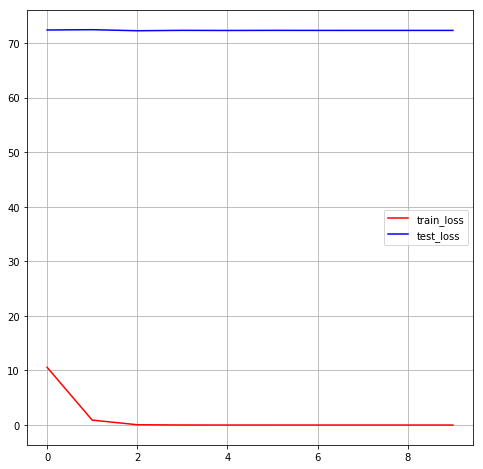

W[:10],  
[[ 0.41531229  0.66294307  0.70548952  0.13929018  0.60503608  0.95227802
  -0.28593445 -1.50946486 -0.93959814  0.50608563]]
<NDArray 1x10 @cpu(0)> 
 b: 
[-0.3102684]
<NDArray 1 @cpu(0)>


In [5]:
train(0)

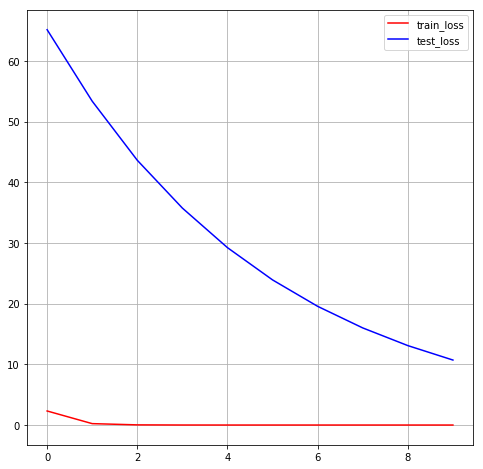

W[:10],  
[[ 0.31298184  0.14758898  0.16915622  0.69101334 -0.08795033  0.57311976
   0.70786875 -0.12778808  0.09098398 -0.60036278]]
<NDArray 1x10 @cpu(0)> 
 b: 
[ 0.01176986]
<NDArray 1 @cpu(0)>


In [6]:
train(1)